In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("vgsales.csv")

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Checking type of each column for this dataset

In [5]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [6]:
df= df.sort_values(by="Global_Sales", ascending = False)

In [7]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [8]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Checking missing values

In [9]:
df.shape

(16719, 16)

In [10]:
# Replace missing values for numerical columns with mean
numerical_columns = ['Critic_Score', 'Critic_Count', 'User_Count']
for column in numerical_columns:
    if df[column].dtype != 'object':  # Checking if the column is numeric
        
            # Replace missing values with the mean
            df[column].fillna(df[column].mean(), inplace=True)


Replacing numerical missing vlaues per Mean of it

In [11]:
# Replace missing values for categorical columns with mode
categorical_columns = ['Developer', 'Rating','User_Score']
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

Replacing categorical missing values per the mode

In [12]:
df.isnull().sum()

Name                 2
Platform             0
Year_of_Release    269
Genre                2
Publisher           54
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score         0
Critic_Count         0
User_Score           0
User_Count           0
Developer            0
Rating               0
dtype: int64

checking the missing vlaues after replacing per mean and mode

In [13]:
df=df.dropna()

In [14]:
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

After drop the remaining missing values(choose this option because had just a small number of missing values if compared of the total)

In [15]:
df['Year_of_Release'] = pd.to_datetime(df['Year_of_Release'], format='%Y')


Replace the values to dates, with the previous values were impossible to know the release year of each game)

In [16]:
df.columns = df.columns.str.upper()

Change all the columns name for upper letter

In [31]:
df.head()

,NAME,PLATFORM,YEAR_OF_RELEASE,GENRE,PUBLISHER,NA_SALES,EU_SALES,JP_SALES,OTHER_SALES,GLOBAL_SALES,CRITIC_SCORE,CRITIC_COUNT,USER_SCORE,USER_COUNT,DEVELOPER,RATING
0,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,tbd,162.229908,Ubisoft,E
2,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.3,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,tbd,162.229908,Ubisoft,E


In [17]:
ps2 = df[df['PLATFORM']=='PS2']
ps2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2127 entries, 17 to 16294
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   NAME             2127 non-null   object        
 1   PLATFORM         2127 non-null   object        
 2   YEAR_OF_RELEASE  2127 non-null   datetime64[ns]
 3   GENRE            2127 non-null   object        
 4   PUBLISHER        2127 non-null   object        
 5   NA_SALES         2127 non-null   float64       
 6   EU_SALES         2127 non-null   float64       
 7   JP_SALES         2127 non-null   float64       
 8   OTHER_SALES      2127 non-null   float64       
 9   GLOBAL_SALES     2127 non-null   float64       
 10  CRITIC_SCORE     2127 non-null   float64       
 11  CRITIC_COUNT     2127 non-null   float64       
 12  USER_SCORE       2127 non-null   object        
 13  USER_COUNT       2127 non-null   float64       
 14  DEVELOPER        2127 non-null   object    

In [18]:
ps3 = df[df['PLATFORM']=='PS3']
ps3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 16 to 16286
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   NAME             1306 non-null   object        
 1   PLATFORM         1306 non-null   object        
 2   YEAR_OF_RELEASE  1306 non-null   datetime64[ns]
 3   GENRE            1306 non-null   object        
 4   PUBLISHER        1306 non-null   object        
 5   NA_SALES         1306 non-null   float64       
 6   EU_SALES         1306 non-null   float64       
 7   JP_SALES         1306 non-null   float64       
 8   OTHER_SALES      1306 non-null   float64       
 9   GLOBAL_SALES     1306 non-null   float64       
 10  CRITIC_SCORE     1306 non-null   float64       
 11  CRITIC_COUNT     1306 non-null   float64       
 12  USER_SCORE       1306 non-null   object        
 13  USER_COUNT       1306 non-null   float64       
 14  DEVELOPER        1306 non-null   object    

In [19]:
ps4 = df[df['PLATFORM']=='PS4']
ps4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393 entries, 31 to 16365
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   NAME             393 non-null    object        
 1   PLATFORM         393 non-null    object        
 2   YEAR_OF_RELEASE  393 non-null    datetime64[ns]
 3   GENRE            393 non-null    object        
 4   PUBLISHER        393 non-null    object        
 5   NA_SALES         393 non-null    float64       
 6   EU_SALES         393 non-null    float64       
 7   JP_SALES         393 non-null    float64       
 8   OTHER_SALES      393 non-null    float64       
 9   GLOBAL_SALES     393 non-null    float64       
 10  CRITIC_SCORE     393 non-null    float64       
 11  CRITIC_COUNT     393 non-null    float64       
 12  USER_SCORE       393 non-null    object        
 13  USER_COUNT       393 non-null    float64       
 14  DEVELOPER        393 non-null    object     

In [20]:
pc = df[df['PLATFORM']=='PC']
pc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 85 to 16298
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   NAME             952 non-null    object        
 1   PLATFORM         952 non-null    object        
 2   YEAR_OF_RELEASE  952 non-null    datetime64[ns]
 3   GENRE            952 non-null    object        
 4   PUBLISHER        952 non-null    object        
 5   NA_SALES         952 non-null    float64       
 6   EU_SALES         952 non-null    float64       
 7   JP_SALES         952 non-null    float64       
 8   OTHER_SALES      952 non-null    float64       
 9   GLOBAL_SALES     952 non-null    float64       
 10  CRITIC_SCORE     952 non-null    float64       
 11  CRITIC_COUNT     952 non-null    float64       
 12  USER_SCORE       952 non-null    object        
 13  USER_COUNT       952 non-null    float64       
 14  DEVELOPER        952 non-null    object     

In [21]:
xOne = df[df['PLATFORM']=='XOne']
xOne.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 99 to 16317
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   NAME             247 non-null    object        
 1   PLATFORM         247 non-null    object        
 2   YEAR_OF_RELEASE  247 non-null    datetime64[ns]
 3   GENRE            247 non-null    object        
 4   PUBLISHER        247 non-null    object        
 5   NA_SALES         247 non-null    float64       
 6   EU_SALES         247 non-null    float64       
 7   JP_SALES         247 non-null    float64       
 8   OTHER_SALES      247 non-null    float64       
 9   GLOBAL_SALES     247 non-null    float64       
 10  CRITIC_SCORE     247 non-null    float64       
 11  CRITIC_COUNT     247 non-null    float64       
 12  USER_SCORE       247 non-null    object        
 13  USER_COUNT       247 non-null    float64       
 14  DEVELOPER        247 non-null    object     

In [22]:
x360 = df[df['PLATFORM']=='X360']
x360.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1232 entries, 14 to 16297
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   NAME             1232 non-null   object        
 1   PLATFORM         1232 non-null   object        
 2   YEAR_OF_RELEASE  1232 non-null   datetime64[ns]
 3   GENRE            1232 non-null   object        
 4   PUBLISHER        1232 non-null   object        
 5   NA_SALES         1232 non-null   float64       
 6   EU_SALES         1232 non-null   float64       
 7   JP_SALES         1232 non-null   float64       
 8   OTHER_SALES      1232 non-null   float64       
 9   GLOBAL_SALES     1232 non-null   float64       
 10  CRITIC_SCORE     1232 non-null   float64       
 11  CRITIC_COUNT     1232 non-null   float64       
 12  USER_SCORE       1232 non-null   object        
 13  USER_COUNT       1232 non-null   float64       
 14  DEVELOPER        1232 non-null   object    

In [23]:
sframe = [ps2,ps3,ps4]
sony = pd.concat(sframe)
sony.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3826 entries, 17 to 16365
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   NAME             3826 non-null   object        
 1   PLATFORM         3826 non-null   object        
 2   YEAR_OF_RELEASE  3826 non-null   datetime64[ns]
 3   GENRE            3826 non-null   object        
 4   PUBLISHER        3826 non-null   object        
 5   NA_SALES         3826 non-null   float64       
 6   EU_SALES         3826 non-null   float64       
 7   JP_SALES         3826 non-null   float64       
 8   OTHER_SALES      3826 non-null   float64       
 9   GLOBAL_SALES     3826 non-null   float64       
 10  CRITIC_SCORE     3826 non-null   float64       
 11  CRITIC_COUNT     3826 non-null   float64       
 12  USER_SCORE       3826 non-null   object        
 13  USER_COUNT       3826 non-null   float64       
 14  DEVELOPER        3826 non-null   object    

In [24]:
mframes = [x360,xOne]
microsoft = pd.concat(mframes)
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1479 entries, 14 to 16317
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   NAME             1479 non-null   object        
 1   PLATFORM         1479 non-null   object        
 2   YEAR_OF_RELEASE  1479 non-null   datetime64[ns]
 3   GENRE            1479 non-null   object        
 4   PUBLISHER        1479 non-null   object        
 5   NA_SALES         1479 non-null   float64       
 6   EU_SALES         1479 non-null   float64       
 7   JP_SALES         1479 non-null   float64       
 8   OTHER_SALES      1479 non-null   float64       
 9   GLOBAL_SALES     1479 non-null   float64       
 10  CRITIC_SCORE     1479 non-null   float64       
 11  CRITIC_COUNT     1479 non-null   float64       
 12  USER_SCORE       1479 non-null   object        
 13  USER_COUNT       1479 non-null   float64       
 14  DEVELOPER        1479 non-null   object    

In [25]:
ps2gs = round(ps2['GLOBAL_SALES'].sum())
ps3gs = round(ps3['GLOBAL_SALES'].sum())
ps4gs = round(ps4['GLOBAL_SALES'].sum())
xonegs = round(xOne['GLOBAL_SALES'].sum())
x360gs = round(x360['GLOBAL_SALES'].sum())
pcgs = round(pc['GLOBAL_SALES'].sum())
sonygs = round(sony['GLOBAL_SALES'].sum())
microsoftgs = round(microsoft['GLOBAL_SALES'].sum())
print(ps2gs,ps3gs,ps4gs,xonegs,x360gs,pcgs,sonygs,microsoftgs)

1233 931 314 159 961 256 2479 1121


Data separated by plataform and after concatenated by brand/producer

/var/folders/qy/zz_5x96n0dq4b9sg_y_09qrm0000gn/T/ipykernel_9508/1470734454.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=splatforms, y=stotal_sales, palette='icefire',ax=axes[0])
/var/folders/qy/zz_5x96n0dq4b9sg_y_09qrm0000gn/T/ipykernel_9508/1470734454.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mplatforms, y=mtotal_sales, palette='viridis',ax=axes[1])


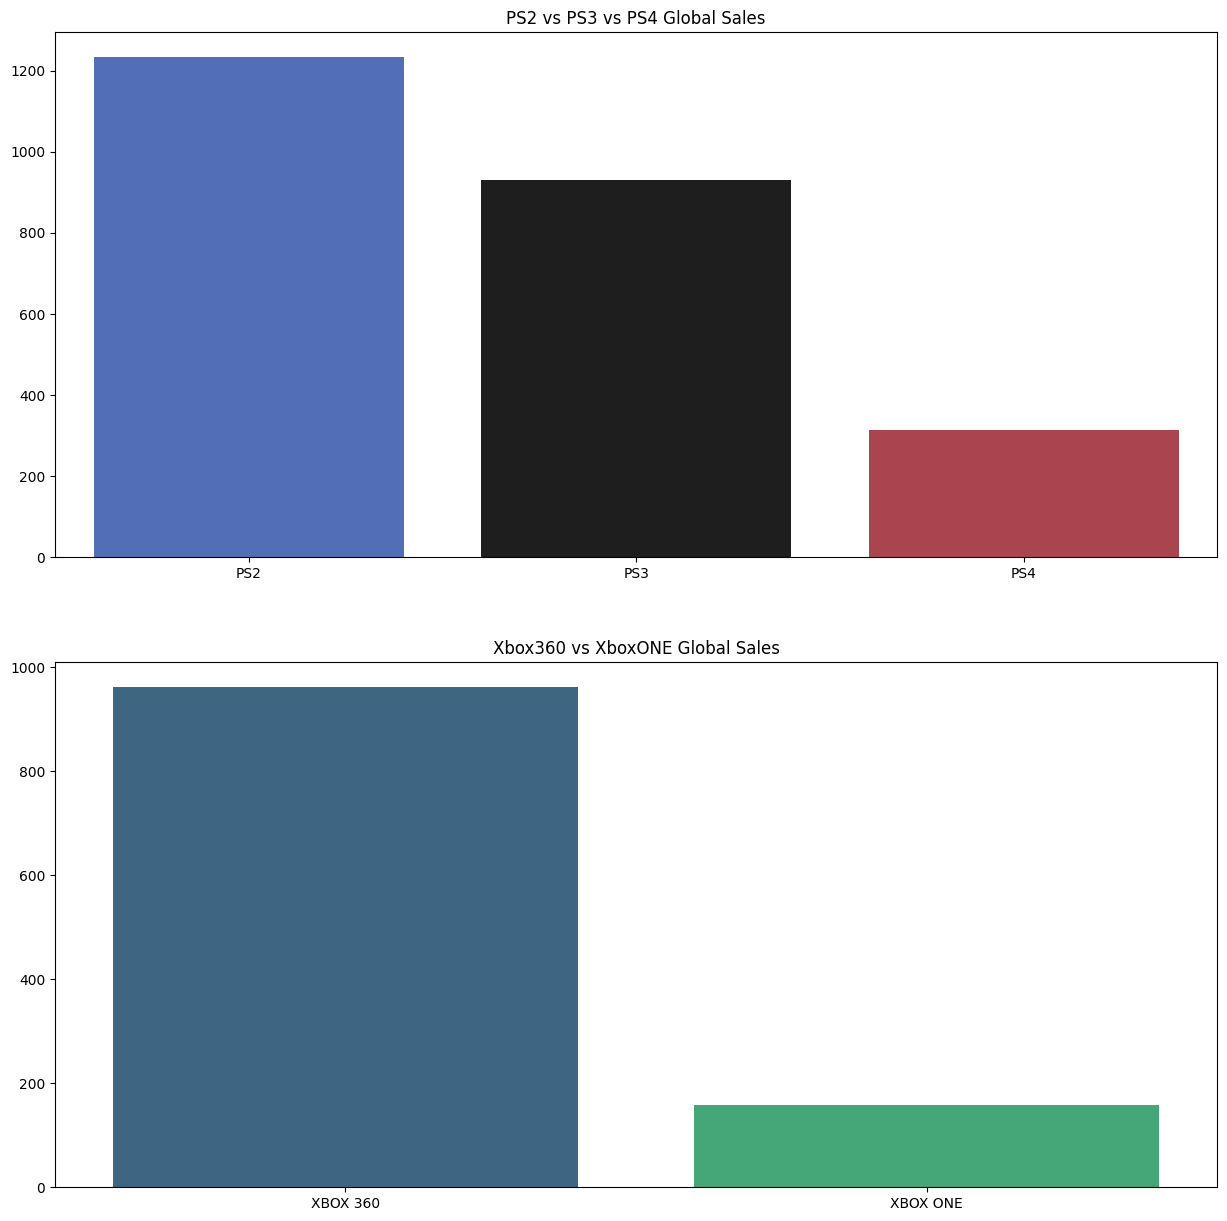

In [26]:
#creating lists for sony's global_sales and platforms
stotal_sales = [ps2gs,ps3gs,ps4gs]
splatforms=['PS2','PS3','PS4']

#creating lists for microsoft's global_sales and platforms
mtotal_sales=[x360gs,xonegs]
mplatforms=['XBOX 360','XBOX ONE']

#creating subplot
fig, axes = plt.subplots(2,1,figsize=(15,15))

#creating barplot for sony's platforms
sns.barplot(x=splatforms, y=stotal_sales, palette='icefire',ax=axes[0])
axes[0].set_title('PS2 vs PS3 vs PS4 Global Sales')

#creating barplot for microsoft's platforms
sns.barplot(x=mplatforms, y=mtotal_sales, palette='viridis',ax=axes[1])
axes[1].set_title('Xbox360 vs XboxONE Global Sales')


plt.show()

Compartion between PS2,PS3 and PS4 and after between Xbox 360 and Xbox One in number of sales

/var/folders/qy/zz_5x96n0dq4b9sg_y_09qrm0000gn/T/ipykernel_9508/359593771.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pc,x='GENRE',palette='rocket',ax=axes[0])
/var/folders/qy/zz_5x96n0dq4b9sg_y_09qrm0000gn/T/ipykernel_9508/359593771.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ps4,x='GENRE',palette='mako',ax=axes[1])
/var/folders/qy/zz_5x96n0dq4b9sg_y_09qrm0000gn/T/ipykernel_9508/359593771.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=xOne,x='GENRE',palette='viridis',ax=axes[2])


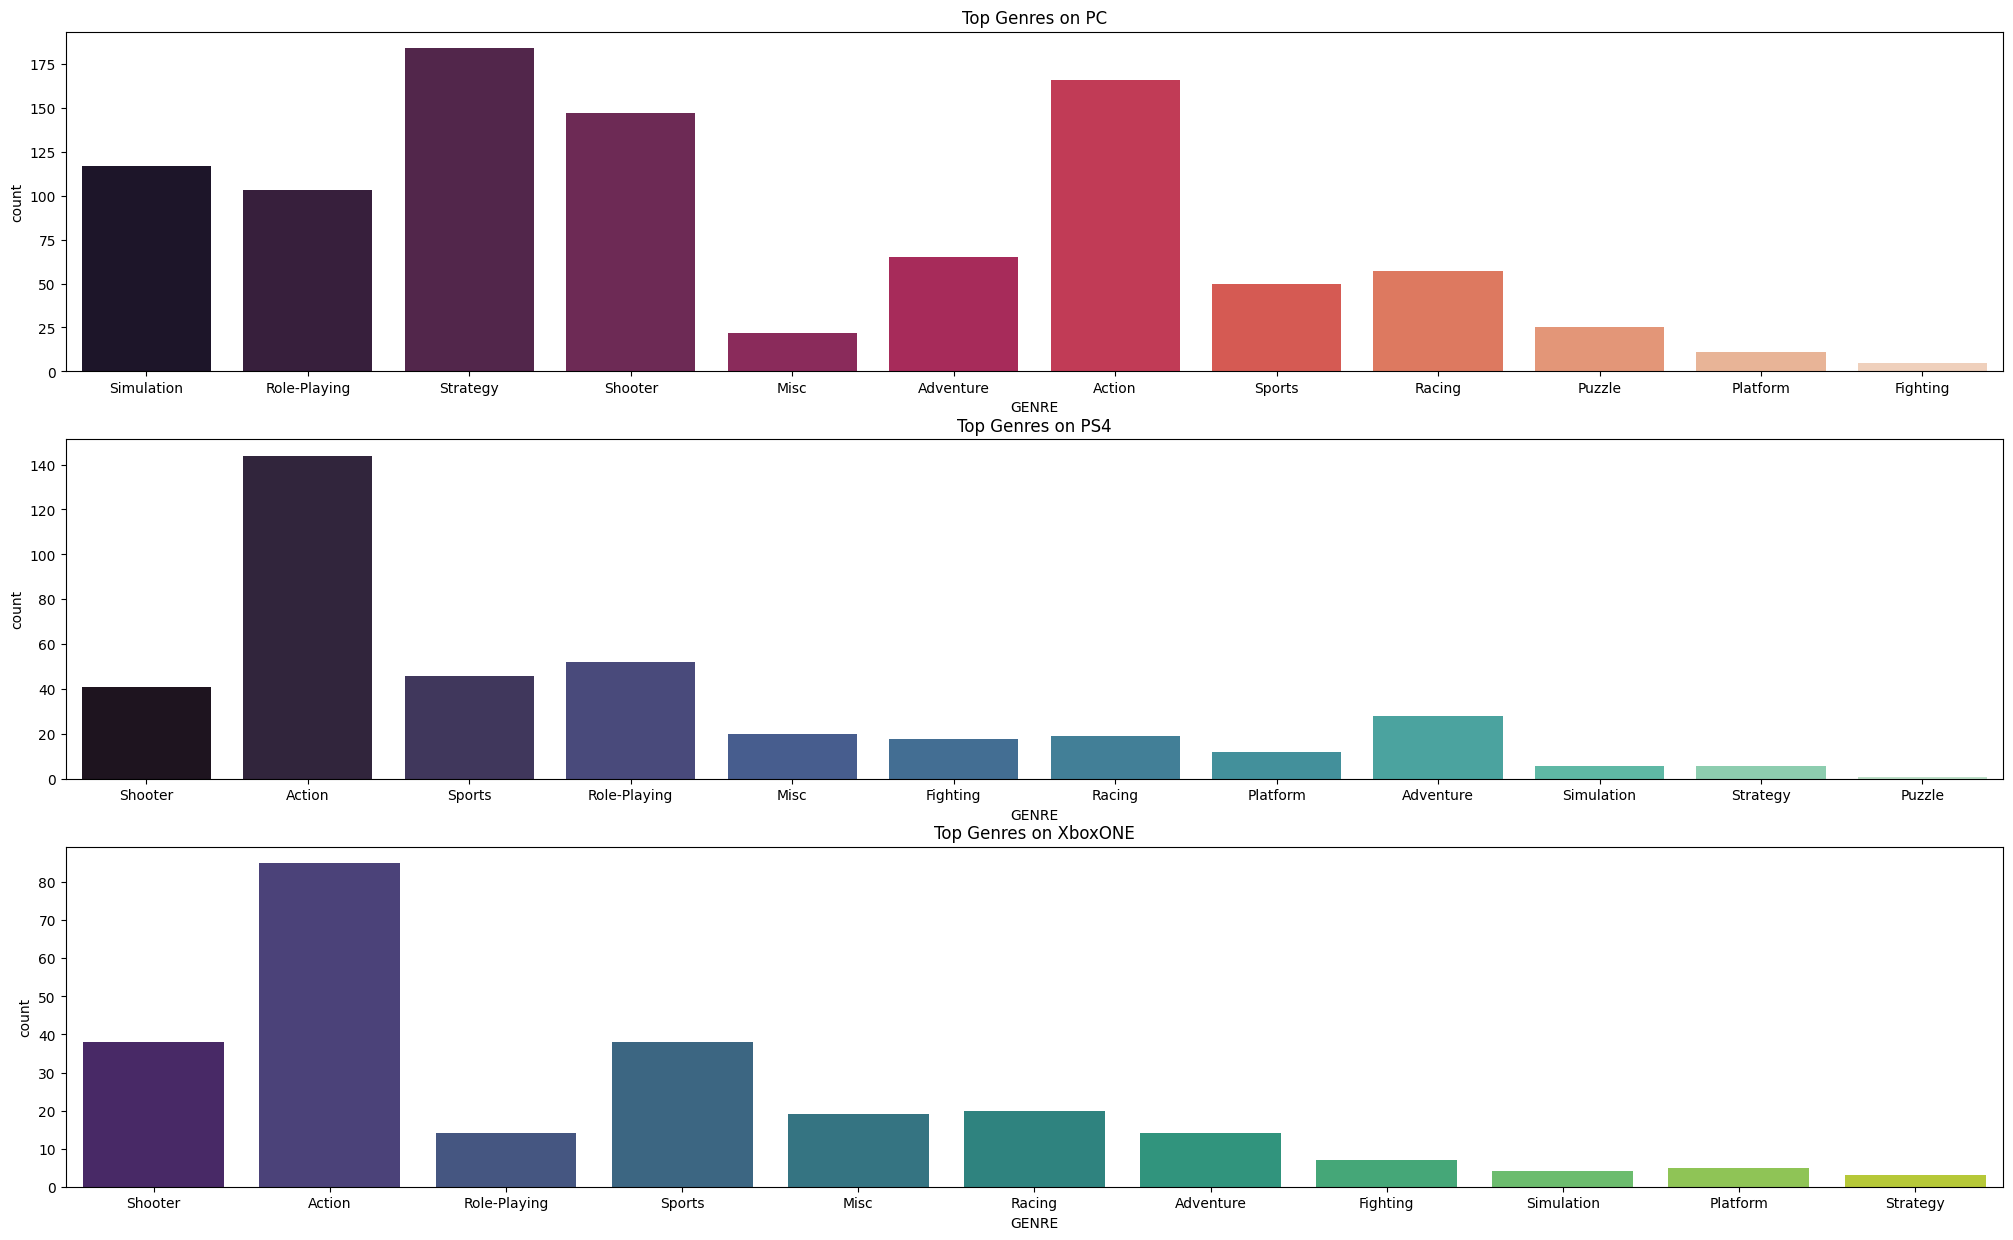

In [27]:
#creating subplots
fig , axes =plt.subplots(nrows=3,ncols=1,figsize=(25,15))

#create countplot for PC
sns.countplot(data=pc,x='GENRE',palette='rocket',ax=axes[0])
axes[0].set_title('Top Genres on PC')

#create countplot for Sony
sns.countplot(data=ps4,x='GENRE',palette='mako',ax=axes[1])
axes[1].set_title('Top Genres on PS4')

#creating countplot for Microsoft
sns.countplot(data=xOne,x='GENRE',palette='viridis',ax=axes[2])
axes[2].set_title('Top Genres on XboxONE')
plt.show()

Checking which gender of games have more sales, separated by plataform.

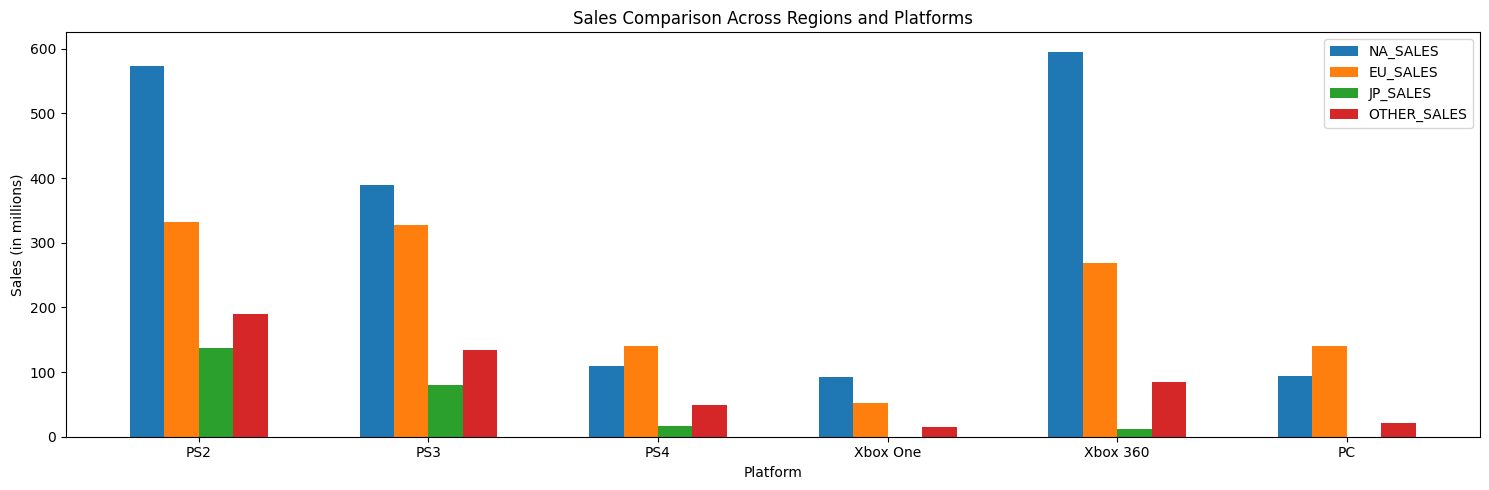

In [29]:
platforms = ['PS2', 'PS3', 'PS4', 'Xbox One', 'Xbox 360', 'PC']
regions = ['NA_SALES', 'EU_SALES', 'JP_SALES', 'OTHER_SALES']

# Sales data for each platform and region
sales_data = {
    'PS2': [ps2[region].sum() for region in regions],
    'PS3': [ps3[region].sum() for region in regions],
    'PS4': [ps4[region].sum() for region in regions],
    'Xbox One': [xOne[region].sum() for region in regions],
    'Xbox 360': [x360[region].sum() for region in regions],
    'PC': [pc[region].sum() for region in regions]
}

# Convert data to numpy array for plotting
sales_array = np.array([[sales_data[platform][i] for platform in platforms] for i in range(len(regions))])

# Plotting the grouped bar chart
plt.figure(figsize=(15, 5))
bar_width = 0.15
index = np.arange(len(platforms))

for i in range(len(regions)):
    plt.bar(index + i * bar_width, sales_array[i], bar_width, label=regions[i])

plt.xlabel('Platform')
plt.ylabel('Sales (in millions)')
plt.title('Sales Comparison Across Regions and Platforms')
plt.xticks(index + bar_width * 1.5, platforms)
plt.legend()
plt.tight_layout()
plt.show()

Checking each region of the world have more sales in each plataform

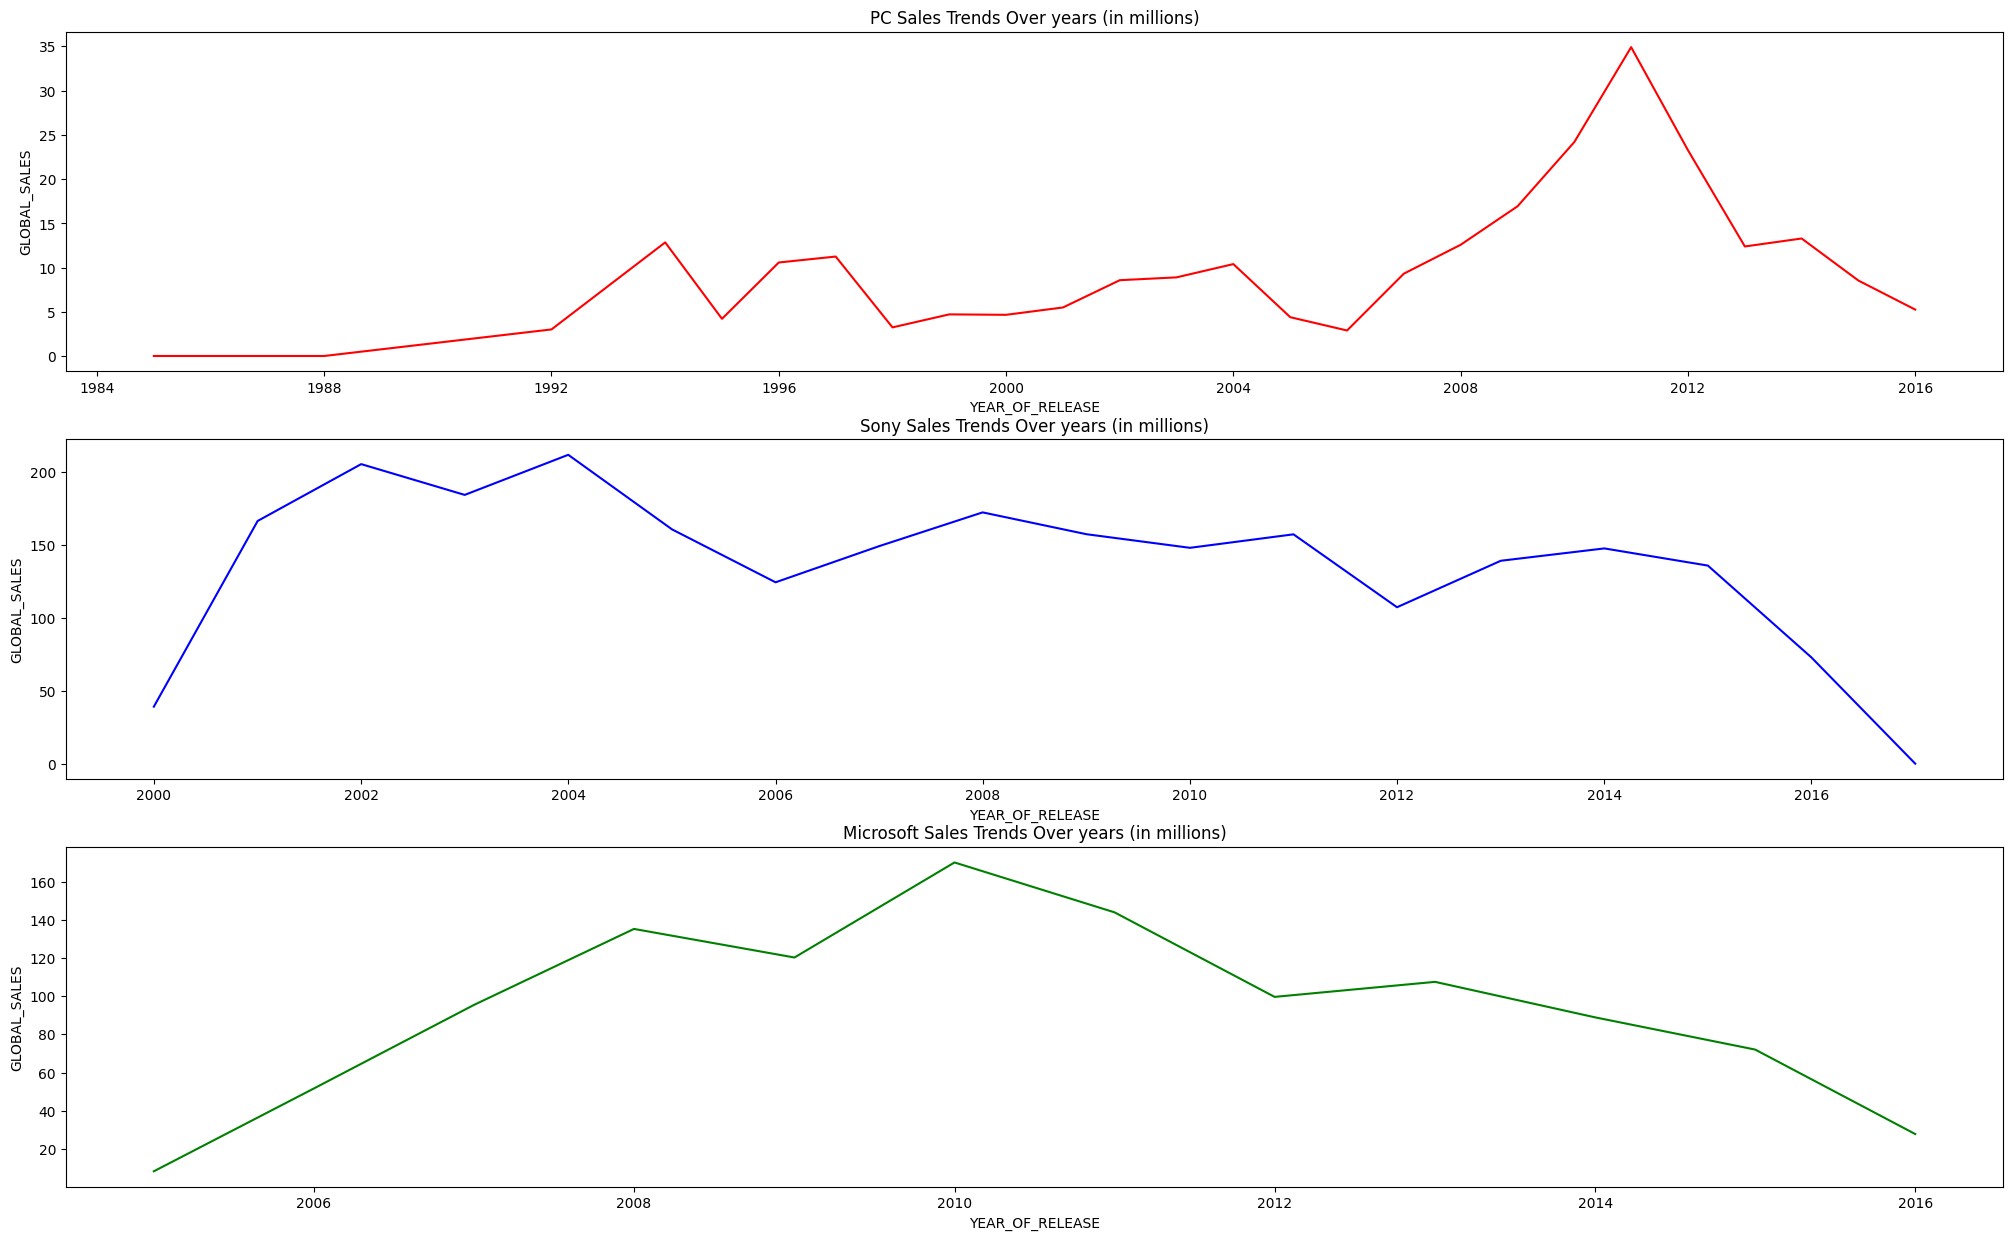

In [32]:
#creating subplot
fig , axes  = plt.subplots(3,1,figsize=(25,15))

#creating lineplot for PC
sns.lineplot(data=pc.groupby('YEAR_OF_RELEASE')['GLOBAL_SALES'].sum(),ax=axes[0],color='red')
axes[0].set_title('PC Sales Trends Over years (in millions)')

#creating lineplot for Sony
sns.lineplot(data=sony.groupby('YEAR_OF_RELEASE')['GLOBAL_SALES'].sum(),ax=axes[1],color='blue')
axes[1].set_title('Sony Sales Trends Over years (in millions)')

#creating lineplot for Microsoft
sns.lineplot(data=microsoft.groupby('YEAR_OF_RELEASE')['GLOBAL_SALES'].sum(),ax=axes[2],color='green')
axes[2].set_title('Microsoft Sales Trends Over years (in millions)')

plt.show()

Graph showing the sale(in million) in each period of year and splitted by plataform

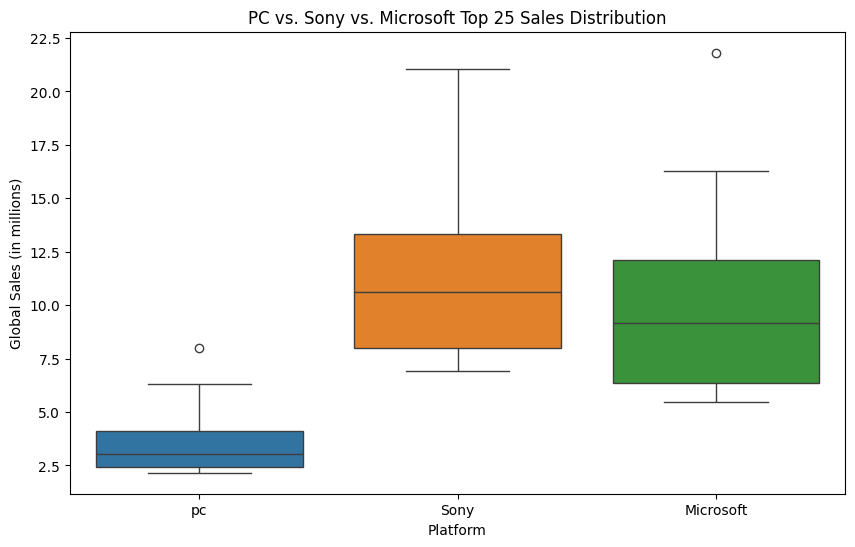

In [33]:
#detrmining top global sales games for pc, sony & microsoft
top_games_pc = pc.nlargest(25, 'GLOBAL_SALES')
top_games_sony = sony.nlargest(25, 'GLOBAL_SALES')
top_games_microsoft = microsoft.nlargest(25, 'GLOBAL_SALES')

# Add a 'Platform' column to each subset indicating the platform
top_games_pc['PLATFORM'] = 'pc'
top_games_sony['PLATFORM'] = 'Sony'
top_games_microsoft['PLATFORM'] = 'Microsoft'

# Combine data
combined_top25 = pd.concat([top_games_pc, top_games_sony, top_games_microsoft])

# Plotting the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='PLATFORM', y='GLOBAL_SALES', data=combined_top25, hue='PLATFORM')
plt.title('PC vs. Sony vs. Microsoft Top 25 Sales Distribution')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.show()

The top25 sales for each plataform, in million of sales